## This model expands the simple spherical and symmetric wind model with a constant wind velocity, along with a 'pseudo signal' revolving within it by indroducing an elliptical orbit.
## The main goal of this model is to quantify the amount of electrons along a line of sight from the orbit given an orbital phase, inclination and eccentricity.
## Stellar parameters are modelled after the star SS 2883 of the HMXB system PSR B1259-63. Wind terminal velocity is taken from the paper - https://arxiv.org/pdf/0806.4868, while the remaining stellar properties are taken from https://arxiv.org/abs/astro-ph/0501660.

# Equations and Geometry
## Electron number density
# $n_{e}(r) = \frac{\rho}{\mu_{e}m_{p}} = \frac{\dot{M}}{4\pi\mu_{e}m_{p}r^2v_{\infty}} = \frac{k}{r^2}$
Where
# $\rho = \frac{\dot{M}}{4\pi r^2v_{\infty}}$
And
# $k = \frac{\dot{M}}{4\pi\mu_{e}m_{p}v_{\infty}}$
With
* $\rho$ =      Density
* $\mu_{e}$ =   Mean molecular weight per free electron (typically set at a value of 1.2)
* $m_{p}$ =     Proton mass
* $\dot{M}$ =   Wind mass loss
* $v_{\infty}$ = Wind terminal velocity
* $r$ =         radial distance from the center of the star

By placing the star and orbit at the xy plane origin, we can consider an elliptical orbit in cartesian coordinates
# $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$
with
* $a$ = Semi-major axis
* $b$ = Semi-minor axis
The semi-minor axis can be defined as $a\sqrt{1 - e^2}$, where $e^2$ is the eccentricity.
In polar coordinates, since the ellipse is offset by along the x-axis by the focus - $f = ae$, the coordinates relative to the star are
## $x = rcos(\phi) - ae$, $y = bsin(\phi)$, and $r = \sqrt{x^2 + y^2}$
The orbital separation in polar coordinates becomes
# $r = \frac{a(1-e^2)}{1+ecos(\phi)}$
Where $\phi$ is the true anomaly.
The signal position in polar coordinates is defined as $r_s = r(cos(\phi + \omega),sin(\phi + \omega),0)$, where $\omega$ is the argument of periastron. The observer unit vector (direction of signal to observer) is then defined as $\hat{n} = (sin(i)cos(\Omega), sin(i)sin(\Omega), cos(i))$, where $i$ is the inclination and $\Omega$ is the longitude of ascending node. The radial distance of the signal from the star along the path of the line of sight becomes $r(s) = r_s + s\hat{n}$, where $s\ge0$, is the distance along the line of sight. 

The number density at a specific point along the orbit can then be described as
# $n_e(r(s)) = \frac{k}{r(s)^2}$

From the definition of $r(s)$, 

## $r(s)^2 = (r_s + s\hat{n})^2 = r^2 + 2rs [cos(\phi + \omega) sin (i)cos(\Omega) + sin(\phi + \omega)sin(i)sin(\Omega)] + s^2$

## Dispersion Measure
# $DM(\phi,i) = \int_{0}^{\infty}n_e(|r(s)|)ds = k\int_{0}^{\infty}\frac{ds}{|r(s)|^2}$

let $A = r cos(\phi + \omega) sin (i) cos(\Omega) + sin(\phi + \omega) sin(i) sin(\Omega)$ be the projection of the orbital separation along the line of sight, and $B = \sqrt{r^2 - A^2} = r\sqrt{1 - cos(\phi + \omega)^2 sin (i)^2 cos(\Omega)^2 + sin(\phi + \omega)^2 sin(i)^2 sin(\Omega)^2}$ the perpendicular distance, the dispersion measure becomes
# $DM(\phi,i) = \frac{k}{B}[\frac{\pi}{2} - arctan(\frac{A}{B})]$

## Semi-major axis of PSR B1259-63
Given that the orbital period of PSR B1259-63 is approximately 1237 days, using Kepler's 3rd law, the semi-major axis is
# $a^3 = \frac{P^2G(M + m)}{4\pi^2} \sim 1091R_\odot$
With
* $P$ = Orbital period
* G = Gravitational constant
* M = Mass of SS 2883
* m = Mass of PSR B1259-63

In [1]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as con

In [2]:
#Number density function
def num_density(phi, i, a_Rsun, Mdot_Msun_per_yr, v_inf_kms, s, e, omega, Omega, mu_e=1.2):
    '''This function calculates the number density at a specific point along an elliptical orbit within a spherically cymmetric wind 
    with constant velocity.
    -----------------------------------------------------------------------------------------------------------------------------
    parameters:
    
    phi              [float] -> True anomaly (rad)
    i                [float] -> Inclination (rad)
    a_Rsun           [float] -> Orbital radius (solar radii)
    Mdot_Msun_per_yr [float] -> Wind mass loss (solar masses per year)
    v_inf_kms        [float] -> Terminal velocity of wind (km/s)
    mu_e             [float] -> Mean molecular weight per free electron
    e                [float] -> Eccentricity (0 < e < 1)
    s                [float] -> Distance along line of sight from signal (AU)
    omega            [float] -> Argument of periastron (rad)
    Omega            [float] -> Longitude of ascending node (rad)
    
    -----------------------------------------------------------------------------------------------------------------------------
    Returns:
    
    The function returns the number density [float] -> (cm^-3)'''
    a = (a_Rsun * con.R_sun).cgs .value                                                                                  #Converts the semi-mmajor axis from solar radii to cm
    Mdot = (Mdot_Msun_per_yr * con.M_sun / (1 * u.yr)).cgs.value                                                         #Converts the stellar mass loss from solar mass per year to g/s
    v_inf = (v_inf_kms * u.km / u.s).cgs.value                                                                           #Converts the wind velocity from km/s to cm/s
    k = Mdot / (4*np.pi*mu_e*con.m_p*v_inf)                                                                              #Calculates the k constant (cm^-1)
    r = a*(1 - e**2)/(1 + e*np.cos(phi))                                                                                 #Calculates the orbital separation along the orbit
    r_s_sqrd = r**2 + 2*r*s*(np.cos(phi+omega)*np.sin(i)*np.cos(Omega)+np.sin(phi+omega)*np.sin(i)*np.sin(Omega)) + s**2 #Calculates the squared radial distance from the star along the line of sight
    return k/r_s_sqrd  

In [3]:
#DM function
def dm_constant_wind(phi, i, a_Rsun, Mdot_Msun_per_yr, v_inf_kms, e, omega, Omega, mu_e=1.2):
    '''This function calculates the dispersion measure along a line of sight, given orbital phase and inclination, 
    assuming a spherically symmetric wind with constant velocity.
    --------------------------------------------------------------------------------------------------------------
    Parameters:
    
    phi              [float] -> True anomaly (rad)
    i                [float] -> Inclination (rad)
    a_Rsun           [float] -> Orbital radius (solar radii)
    Mdot_Msun_per_yr [float] -> Wind mass loss (solar masses per year)
    v_inf_kms        [float] -> Terminal velocity of wind (km/s)
    e                [float] -> Eccentricity (0 < e < 1)
    omega            [float] -> Argument of periastron (rad)
    Omega            [float] -> Longitude of ascending node (rad)
    mu_e             [float] -> Mean molecular weight per free electron
    
    --------------------------------------------------------------------------------------------------------------
    Returns:
    
    The function returns the dispersion measure [float] -> (pc cm^-3).'''
    a = (a_Rsun * con.R_sun).cgs.value                                                            #Converts the semi-major axis from solar radii to cm
    Mdot = (Mdot_Msun_per_yr * con.M_sun / (1 * u.yr)).cgs.value                                  #Converts the stellar mass loss from solar mass per year to g/s
    v_inf = (v_inf_kms * u.km / u.s).cgs.value                                                    #Converts the wind velocity from km/s to cm/s
    k = Mdot / (4*np.pi*mu_e*con.m_p*v_inf)                                                       #Calculates the k constant (cm^-1)
    r = a*(1 - e**2)/(1 + e*np.cos(phi))                                                          #Calculates the orbital separation along the orbit
    A = r*(np.cos(phi+omega)*np.sin(i)*np.cos(Omega) + np.sin(phi+omega)*np.sin(i)*np.sin(Omega)) #Calculates the A value (cm)
    B = np.sqrt(r**2 - A**2)                                                                      #Calculates the B value (cm)
    
    #Since edge-on inclination (pi/2) results in B=0, it is replaced by a small value at this limit to avoid division by 0
    sv = 1e-12*r
    B = np.maximum(B, sv)                            #Takes the maximum non-zero value
    return (k/B) * (np.pi/2 - np.arctan2(A, B))/u.pc #Dividing by PC to convert to units of pc cm^-3

In [4]:
#Calculating the number density along the line of sight
i_deg = [36, 90, 145, 250]                                                                                            #Inclinations in degrees
i = np.deg2rad(i_deg)                                                                                                 #Converting the inclinations to rad
phi_deg = [0, 100, 165, 320]                                                                                          #Orbital phases in degrees
phi = np.deg2rad(phi_deg)                                                                                             #Converting the orbital phases to rad
om = np.deg2rad(45)                                                                                                   #Argument of periastron deg->rad
Om = np.deg2rad(45)                                                                                                   #Longitude of ascending node deg->rad
s = np.logspace(np.log10(1e11), np.log10((15000 * con.au).value), 512)                                                #Line of sight distance array
n_e1 = num_density(phi[0], i[0], a_Rsun=1091, Mdot_Msun_per_yr=1e-6, v_inf_kms=1350, s=s, e=0.87, omega=om, Omega=Om) #Number densities
n_e2 = num_density(phi[1], i[1], a_Rsun=1091, Mdot_Msun_per_yr=1e-6, v_inf_kms=1350, s=s, e=0.87, omega=om, Omega=Om)
n_e3 = num_density(phi[2], i[2], a_Rsun=1091, Mdot_Msun_per_yr=1e-6, v_inf_kms=1350, s=s, e=0.87, omega=om, Omega=Om)
n_e4 = num_density(phi[3], i[3], a_Rsun=1091, Mdot_Msun_per_yr=1e-6, v_inf_kms=1350, s=s, e=0.87, omega=om, Omega=Om)

In [5]:
#print(s)
#print(n_e)

When plotting the number density as a function of line of sight distance, it is important to revisit the squared radial distance from the star along the line of sight:
## $r(s)^2 = (r_s + s\hat{n})^2 = r^2 + 2rs [cos(\phi + \omega) sin (i)cos(\Omega) + sin(\phi + \omega)sin(i)sin(\Omega)] + s^2$
As we can see, when
## $r >> s$, $r(s)^2 \approx r^2$
so
## $n_e(r(s)) \approx \frac{k}{r^2} = const$
Therefore, we can only start seeing a power law relation when 
## $r \sim s$

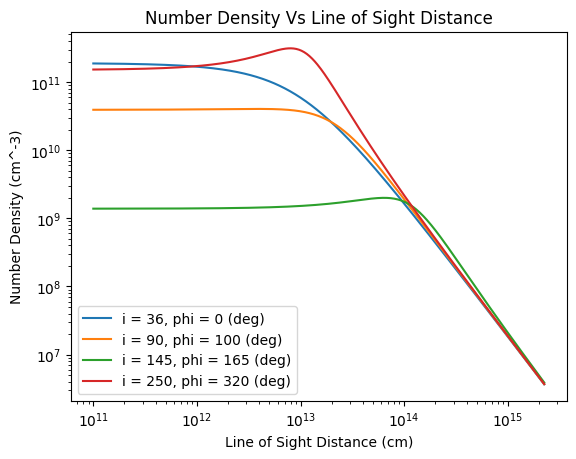

In [6]:
#Plotting the number density as a function of line of sight distance
plt.plot(s, n_e1, label = 'i = ' + str(i_deg[0]) + ', phi = ' + str(phi_deg[0]) + ' (deg)')
plt.plot(s, n_e2, label = 'i = ' + str(i_deg[1]) + ', phi = ' + str(phi_deg[1]) + ' (deg)')
plt.plot(s, n_e3, label = 'i = ' + str(i_deg[2]) + ', phi = ' + str(phi_deg[2]) + ' (deg)')
plt.plot(s, n_e4, label = 'i = ' + str(i_deg[3]) + ', phi = ' + str(phi_deg[3]) + ' (deg)')
plt.title('Number Density Vs Line of Sight Distance')
plt.xlabel('Line of Sight Distance (cm)')
plt.ylabel('Number Density (cm^-3)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [7]:
#Calculating the DM
i_deg = 36                                                                                                    #Inclination in degrees
i = np.deg2rad(i_deg)                                                                                         #Converting the inclination to rad
phi = np.linspace(0, 2*np.pi, 512, endpoint=False)                                                            #Orbital phase array in rad (redundancy removed)
DM = dm_constant_wind(phi, i, a_Rsun=1091, Mdot_Msun_per_yr=1e-6, v_inf_kms=1350, e=0.87, omega=om, Omega=Om) #Dispersion measure

In [8]:
#print(phi)
#print(DM)

Text(0, 0.5, 'Dispersion Measure (pc cm^-3)')

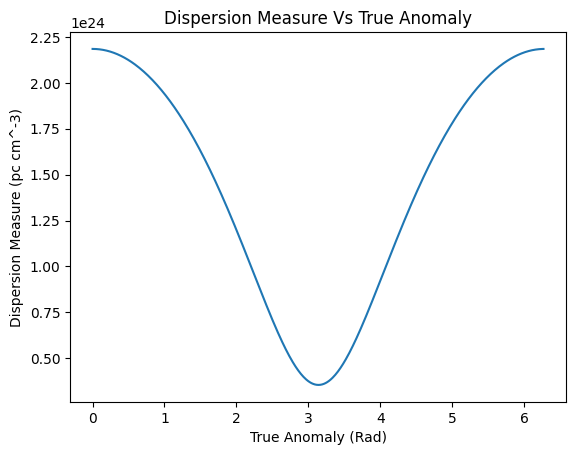

In [9]:
#Plotting the DM as a function of the orbital phase
plt.plot(phi, DM)
plt.title('Dispersion Measure Vs True Anomaly')
plt.xlabel('True Anomaly (Rad)')
plt.ylabel('Dispersion Measure (pc cm^-3)')